# Initialize my Notebook

In [2]:
using Plots
gr()


Plots.GRBackend()

# Complex numbers in Julia

In [3]:
z= 2 + 3im

2 + 3im

In [4]:
@show x=real(z)
@show y=imag(z)
@show conj(z)

x = real(z) = 2
y = imag(z) = 3
conj(z) = 2 - 3im


2 - 3im

In [5]:
@show (x - y*im)*z
@show abs(z)^2
@show conj(z)
@show abs(2 * 3*im)
@show z*conj(z) - abs(z)^2

(x - y * im) * z = 13 + 0im
abs(z) ^ 2 = 12.999999999999998
conj(z) = 2 - 3im
abs(2 * 3 * im) = 6.0
z * conj(z) - abs(z) ^ 2 = 1.7763568394002505e-15 + 0.0im


1.7763568394002505e-15 + 0.0im

# z1/z2 ? 

In [6]:
z1=11+4*im
z2=pi-14*im
z1/z2

-0.10415564197974829 + 0.8090867571195361im

# z[k] = a^k z0 

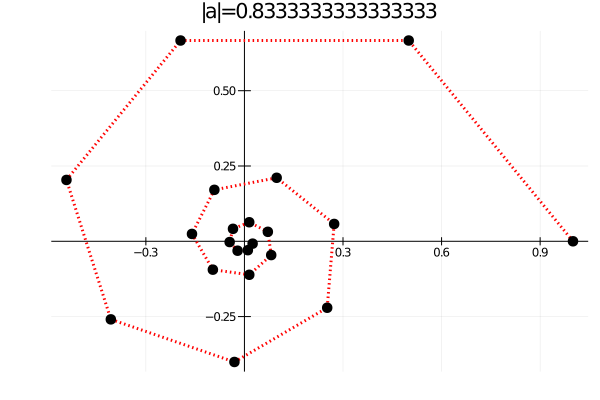

Angle of a in degrees is 53.13010235415598


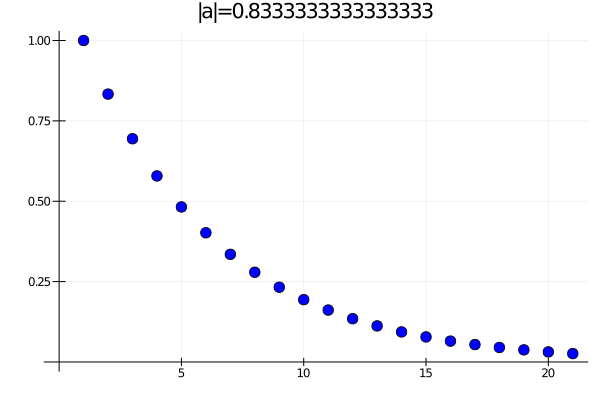

In [7]:
a=(3 + 4*im)/6; theta=angle(a)*180/pi; #a=a/abs(a); 
#theta=pi/3; a = cos(theta) + sin(theta)*im
println("Angle of a in degrees is $theta") 
N=20
zVec=Vector{Complex{Float64}}(undef,N+1)
#
#
z0=1.0+0*im
zVec[1]=z0
for k=1:N
    zVec[k+1]=a*zVec[k]
 end

#scatter(1:(N+1), abs.(zVec))

mag_a = abs(a)
p1=plot(real(zVec), imag(zVec), legend = false, line = (:dot, 3), color=:red, title="|a|=$mag_a")
p1=scatter!(real(zVec), imag(zVec), legend = false, framestyle = :origin, markersize = 6, color=:black, title="|a|=$mag_a")
display(p1)
#
p2=scatter(1:N+1, abs.(zVec), legend = false, framestyle = :origin, markersize = 6, color=:blue, title="|a|=$mag_a")


# Eigenvalues and Eigenvectors

In [13]:
using LinearAlgebra

LoadError: syntax: invalid identifier name "?"

In [17]:
? eigen

search: eigen eigen! Eigen GeneralizedEigen weighted_color_mean eigvecs



```
eigen(A; permute::Bool=true, scale::Bool=true, sortby) -> Eigen
```

Computes the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

For general nonsymmetric matrices it is possible to specify how the matrix is balanced before the eigenvector calculation. The option `permute=true` permutes the matrix to become closer to upper triangular, and `scale=true` scales the matrix by its diagonal elements to make rows and columns more equal in norm. The default is `true` for both options.

By default, the eigenvalues and vectors are sorted lexicographically by `(real(λ),imag(λ))`. A different comparison function `by(λ)` can be passed to `sortby`, or you can pass `sortby=nothing` to leave the eigenvalues in an arbitrary order.   Some special matrix types (e.g. [`Diagonal`](@ref) or [`SymTridiagonal`](@ref)) may implement their own sorting convention and not accept a `sortby` keyword.

# Examples

```jldoctest
julia> F = eigen([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])
Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
3-element Array{Float64,1}:
  1.0
  3.0
 18.0
vectors:
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> F.values
3-element Array{Float64,1}:
  1.0
  3.0
 18.0

julia> F.vectors
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```

---

```
eigen(A, B) -> GeneralizedEigen
```

Computes the generalized eigenvalue decomposition of `A` and `B`, returning a [`GeneralizedEigen`](@ref) factorization object `F` which contains the generalized eigenvalues in `F.values` and the generalized eigenvectors in the columns of the matrix `F.vectors`. (The `k`th generalized eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

Any keyword arguments passed to `eigen` are passed through to the lower-level [`eigen!`](@ref) function.

# Examples

```jldoctest
julia> A = [1 0; 0 -1]
2×2 Array{Int64,2}:
 1   0
 0  -1

julia> B = [0 1; 1 0]
2×2 Array{Int64,2}:
 0  1
 1  0

julia> F = eigen(A, B);

julia> F.values
2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

julia> F.vectors
2×2 Array{Complex{Float64},2}:
  0.0+1.0im   0.0-1.0im
 -1.0+0.0im  -1.0-0.0im

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```

---

```
eigen(A::Union{SymTridiagonal, Hermitian, Symmetric}, irange::UnitRange) -> Eigen
```

Computes the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

The [`UnitRange`](@ref) `irange` specifies indices of the sorted eigenvalues to search for.

!!! note
    If `irange` is not `1:n`, where `n` is the dimension of `A`, then the returned factorization will be a *truncated* factorization.


---

```
eigen(A::Union{SymTridiagonal, Hermitian, Symmetric}, vl::Real, vu::Real) -> Eigen
```

Computes the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

`vl` is the lower bound of the window of eigenvalues to search for, and `vu` is the upper bound.

!!! note
    If [`vl`, `vu`] does not contain all eigenvalues of `A`, then the returned factorization will be a *truncated* factorization.



In [14]:
A=[0 -1; 1 0]
F= eigen(A)
evalues=F.values

2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

In [15]:
@show real(evalues[1])
@show imag(evalues[1])

real(evalues[1]) = 0.0
imag(evalues[1]) = -1.0


-1.0

In [16]:
# (The kth eigenvector can be obtained from the slice F.vectors[:, k].)

evectors=F.vectors

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

In [ ]:
@show real(evectors[1])
@show imag(evectors[1])